# 3. Machine Learning for Classification

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) for churn prediction

# 3.1 The Project Data
- **Dataset**: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## 3.2 Data Preparation

- Downloading the data and reading it with pandas
- Looking at the data (not yet EDA)
- Make column names and values look uniform
- Check if all columns are read correctly
- Check if the churn variable needs any preparation

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
data_source = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
!wget -c $data_source -O data-week-3.csv

--2023-09-26 14:33:24--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [3]:
# Loading the data
df = pd.read_csv("data-week-3.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Steps done here:
- Making everything lower-case
- Removing all whitespaces in column-names and entries and replacing them with `_`

In [4]:
# Replacing all white-spaces from feature-names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Replacing all white-spaces in entries
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [5]:
df.head().T  # For visualization purposes (transpose the dataframe)

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

**General Overview over the data**:

| **`Feature`**     | **`Type`**          |**`Description`**                                                  |
| ----------------- | ------------------- |------------------------------------------------------------------ |
| **customerid**      | `object (String)`     | The customer ID.                                                  |
| **gender**          | `object (String)`     | Whether the customer is a `male` or a `female`.                   |
| **seniorcitizen**   | `numerical (int64)`   | Whether the customer is a senior citizen or not (`1`, `0`).       |
| **partner**         | `object (String)`     | Whether the customer has a partner or not (`yes`, `no`).          |
| **dependents**      | `object (String)`     | Whether the customer has dependents or not (`yes`, `no`).         |
| **tenure**          | `numerical (int64)`   | Number of months the customer has stayed with the company.        |
| **phoneservice**    | `object (String)`     | Whether the customer has a phone service or not (`yes`, `no`).    |
| **multiplelines**   | `object (String)`     | Whether the customer has multiple lines or not (`yes`, `no`, `no_phone_service`). |
| **internetservice** | `object (String)`     | Customer’s internet service provider (`dsl`, `fiber_optic`, `no`).|
| **onlinesecurity**  | `object (String)`     | Whether the customer has online security or not (`yes`, `no`, `no_internet_service`). |
| **onlinebackup**    | `object (String)`     | Whether the customer has online security or not (`yes`, `no`, `no_internet_service`). |
| **deviceprotection**| `object (String)`     | Whether the customer has device protection or not (`yes`, `no`, `no_internet_service`). |
| **techsupport**     | `object (String)`     | Whether the customer has tech support or not (`yes`, `no`, `no_internet_service`). |
| **streamingtv**     | `object (String)`     | Whether the customer has streaming TV or not (`yes`, `no`, `no_internet_service`). |
| **streamingmovies** | `object (String)`     | Whether the customer has streaming movies or not (`yes`, `no`, `no_internet_service`). |
| **contract**        | `object (String)`     | The contract term of the customer (`month-to-month`, `one_year, two_year`). |
| **paperlessbilling**| `object (String)`     | Whether the customer has paperless billing or not (`yes`, `no`). |
| **paymentmethod**   | `object (String)`     | The customer’s payment method (`electronic_check`, `mailed_check`, `bank_transfer_(automatic)`, `credit_card_(automatic)`) | 
| **monthlycharges**  | `numerical (float64)` | The amount charged to the customer monthly. |
| **totalcharges**    | `object (String)`     | The total amount charged to the customer. |
| **churn**           | `object (String)`     | Whether the customer churned or not (`yes`, `no`). | 

In [7]:
print(df["seniorcitizen"].unique())
print(df["totalcharges"].dtypes)
df["totalcharges"].head()

[0 1]
object


0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: object

One can see that `seniorcitizen` is encoded as numeric values and the `totalcharges` are represented as strings, instead of numerical values. The latter observation is a problem, that has to be remedied by converting it to numerical values:

In [8]:
# This operation will result in an error, because missing values were represented as " ".
# Since " " was replaced with "_", there are some values that can not be parsed as numerical values.

tc = pd.to_numeric(df["totalcharges"], errors="coerce") # coerce un-parsable values to NaN

In [9]:
df[tc.isnull()][["customerid", "totalcharges"]] # There are 11 rows with NaN-values / missing entries

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [10]:
# Using the method used above and filling everythin with 0's
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")
df["totalcharges"] = df["totalcharges"].fillna(0)
df[df["totalcharges"].isnull()][["customerid", "totalcharges"]] # Empty!

,customerid,totalcharges


This is maybe not the best approach, since most likely the customers spent money, but this strategy works reasonably well in practice.

**Transforming the `churn`-Variable**

In [11]:
# Alternative: df["churn"] = (df["churn"] == "yes").astype(int)
df["churn"].replace({"yes": 1, "no": 0}, inplace=True)
print("Churn: ", df["churn"].unique())

Churn:  [0 1]


# 3.3 Setting up the validation framework


- Splitting the data into Train-/Val-/Test-set with `scikit-learn`

In [12]:
from sklearn.model_selection import train_test_split
random_state = 1

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, 
                                          random_state=random_state)
print(df_full_train.shape, df_test.shape)

(5634, 21) (1409, 21)


Splitting the `df_full_train` in to `df_train` and `df_val`. We need to know how much many samples $20\%$ out of $80\%$ is.
-  $\frac{20}{80} = \frac{1}{4} = 0.25 = 25\%$

We now split the training set again with the computed ratio

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25,
                                    random_state=random_state)
print("df_train: ", len(df_train), f" | ratio: {len(df_train) / len(df)*100:.0f}%")
print("df_val: ", len(df_val), f"   | ratio: {len(df_val) / len(df) * 100:.0f}%")
print("df_test: ", len(df_test), f"  | ratio: {len(df_test) / len(df) * 100:.0f}%")


df_train:  4225  | ratio: 60%
df_val:  1409    | ratio: 20%
df_test:  1409   | ratio: 20%


**Extracting the target-variable `churn` as $y$ from the dataframe**

In [15]:
# Resetting random indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
# Extracting the churn-values as numpy arrays
y_train = df_train["churn"].values
y_val = df_val["churn"].values
y_test = df_test["churn"].values

In [17]:
# Removing the target-value from the dataframe
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## 3.4 EDA

- Checking missing values
- Look at target variable `churn`
- Look at numerical and categorical variables

In [18]:
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
# What is the percentage of churn to non-churn
df_full_train["churn"].value_counts(normalize=True).round(2)

churn
0    0.73
1    0.27
Name: proportion, dtype: float64

The 27% seen above is the (global) **churn-rate**
- Formula: $\mu_{churn} = \frac{1}{n}\sum_i x_i,\quad x_i\in\{0, 1\}$
- $\frac{\text{\# of 1's}}{n} = \text{churn}$


In [20]:
global_churn_rate = df_full_train["churn"].mean()
round(global_churn_rate, 2)

0.27

**Now: Looking at the other values from the dataframe**

In [21]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

There are 3 (real) numerical variables.
- `tenure`
- `monthlycharges`
- `totalcharges`

In [22]:
numerical = ["tenure", "monthlycharges", "totalcharges"]

Getting all the categorical values from the dataframe

In [23]:
categorical = [
    'gender', 'seniorcitizen', 'partner', 
    'dependents', 'phoneservice', 'multiplelines', 
    'internetservice', 'onlinesecurity', 'onlinebackup', 
    'deviceprotection', 'techsupport', 'streamingtv', 
    'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod'
]

In [24]:
# Most of the columns have only a few discrete values (typical)
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

**`Feature importance (part of EDA)`**: identifying which features affect our target variable
- Churn rate
- Risk ratio
- Mutual indormation (later)

**Churn rate**

$\text{Difference} = \text{GROUP} - \text{GLOBAL}$
- $\text{Difference} > 0$: More likely to churn
- $\text{Difference} < 0$: Less likely to churn

Instead of the global churn rate we here look into the variable and how they relate to churning behaviour.

In [26]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [34]:
# Churn by `gender`
churn_gender = df_full_train.groupby(by="gender")["churn"].mean()
churn_gender

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [35]:
# global churn over everything
global_churn = df_full_train["churn"].mean()
global_churn

0.26996805111821087

In [37]:
df_full_train["partner"].value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [36]:
# churn by `partner`
churn_partner = df_full_train.groupby(by="partner")["churn"].mean()
churn_partner

partner
no     0.329809
yes    0.205033
Name: churn, dtype: float64

In [40]:
diff_no_partner = churn_partner["no"] - global_churn
diff_no_partner

0.05984095297455855

People without a partner are more likely to churn

**Risk ratio**

$Risk = \frac{\text{GROUP}}{\text{GLOBAL}}$
- $Risk > 0$: More likely to churn
- $Risk < 0$: Less likely to churn

```SQL
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

The above query is an example for applying the Difference and Risk computations, however it has to be written in `pandas`-code:

In [43]:
df_group = df_full_train.groupby(by="gender")["churn"].agg(["mean", "count"])
df_group["diff"] = df_group["mean"] - global_churn
df_group["risk"] = df_group["mean"] / global_churn
df_group


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


Now we can use the previously defined variable `categorical` to apply this computation to all categorical variables:

In [51]:
from IPython.display import display

In [52]:
def categorical_metrics(df, columns):
    for c in columns:
        df_group = df.groupby(by=c)["churn"].agg(["mean", "count"])
        df_group["diff"] = df_group["mean"] - global_churn
        df_group["risk"] = df_group["mean"] / global_churn
        display(df_group)

In [53]:
categorical_metrics(df_full_train, categorical)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


**Significant Insights**
- Customers with `month-to-month` contracts are very likely to churn and customers with `two_year` contract are very unlikely to churn
- Customers without partner and without kids that have a month-to-month contract are very likely to churn.

With this procedure, one can get the `diff` and the `risk` for all possible values of a feature, but it would be nice to have an overall value for the entire feature. With this, the overall importance of a feature for a prediction model could be measured.

## 3.6 Feature Importance: mutual Information

**Mutual information**: Concept from information theory, that tells us how much we can learn about one varibale if we know the value of another
- https://en.wikipedia.org/wiki/Mutual_information

In [55]:
from sklearn.metrics import mutual_info_score

In [57]:
mutual_info_score(df_full_train["churn"], df_full_train["contract"])

0.09832038740415643

In [59]:
mutual_info_score(df_full_train["churn"], df_full_train["gender"])

0.00011748462111393909

From the two results above we can see, that the contract-type is far more important for churning thant the gender of the customer.

In [60]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train["churn"])

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

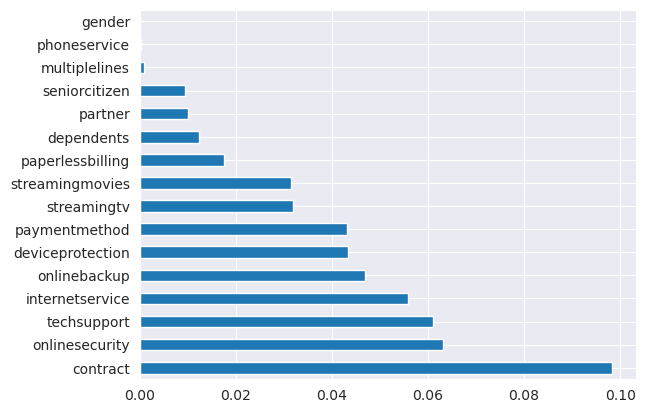

In [72]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi_sorted = mi.sort_values(ascending=False)
mi_sorted.plot(kind='barh')
mi_sorted

With this we can see (and choose) the variables, that are most informative/important for churn-prediction.

## 3.7 Feature Importance: Correlation

How about numerical columns?
- Correlation coefficient: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [74]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [76]:
df_full_train[numerical].corrwith(df_full_train["churn"])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

**Insights**:
- corr(`tenure`, `churn`) $\approx -0.35$: 
    - The longer the tenure the more unlikely it is for a customer to churn
- corr(`monthlycharges`, `churn`) $\approx 0.20$: 
    - The higher the monthly charges are, the more likely customers leave
- corr(`totalcharges`, `churn`) $\approx -0.20$: 
    - The more people pay, the less likely they are to leave the company services 


<= 2 Month of tenure
0.595
2-12 Month of tenure
0.406
          corr
0-2   0.595342
2-12  0.405900
12+   0.179869


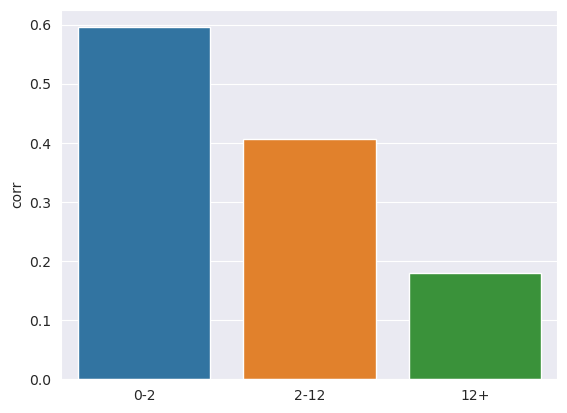

In [98]:
print("<= 2 Month of tenure")
print(f'{df_full_train[df_full_train["tenure"] <= 2]["churn"].mean():.3f}')

print("2-12 Month of tenure")
print(f'{df_full_train[(df_full_train["tenure"] > 2) & (df_full_train["tenure"] < 12)]["churn"].mean():.3f}')

churn_rate_tenure = [
    df_full_train[df_full_train["tenure"] <= 2]["churn"].mean(),
    df_full_train[(df_full_train["tenure"] > 2) & (df_full_train["tenure"] < 12)]["churn"].mean(),
    df_full_train[df_full_train["tenure"] >= 12]["churn"].mean()
]
tenure_index = ["0-2", "2-12", "12+"]
tenure_df = pd.DataFrame(churn_rate_tenure, index=tenure_index, columns=["corr"])
print(tenure_df)
sns.barplot(y=tenure_df["corr"], x=tenure_df.index)
plt.show()

**Insight**:
- In the tenure we can clearly see a negative correlation of months an tenure. Short `tenure` correlates more strongly with `churn`.

Conditioning on certain values or intervals of values of a feature can give insights about the correlation of those features for given values. In the previous example we saw this for `tenure` and `churn`. Let's look at another example:

               corr
<= $20     0.087954
$20 - $50  0.183689
>= $50     0.324993


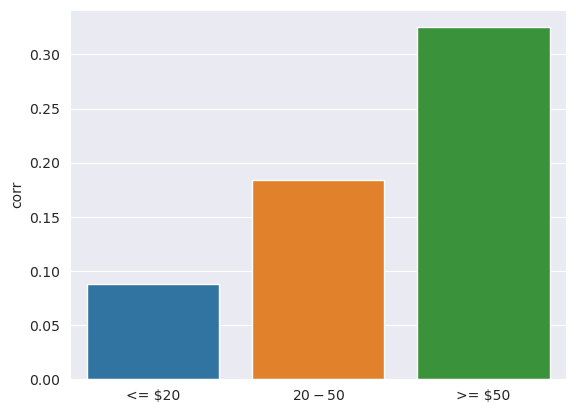

In [103]:
churn_rate_mc = [
    df_full_train[df_full_train["monthlycharges"] <= 20]["churn"].mean(),
    df_full_train[(df_full_train["monthlycharges"] > 20) & (df_full_train["monthlycharges"] < 50)]["churn"].mean(),
    df_full_train[df_full_train["monthlycharges"] > 50]["churn"].mean()
]
mc_index = ["<= $20", "$20 - $50", ">= $50"]
mc_df = pd.DataFrame(churn_rate_mc, index=mc_index, columns=["corr"])
print(mc_df)
sns.barplot(y=mc_df["corr"], x=mc_df.index)
plt.show()

**Insights**:
- clear positive correlation of hight monthly charges with higher propensity to churn

**Importance of Correlation**:
- We can take the absolute value and disregard the sign of the correlation coefficient.
- Tgis way we only get the significance / importance of the correlation of 2 variables

In [104]:
df_full_train[numerical].corrwith(df_full_train["churn"]).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## 3.8 One-Hot Encoding

- Use `scikit-learn` to encoder categorical features

## 3.9 Logistic Regression

- Binary classification
- Linear- vs. Logistic-Regression

## 3.10 Training logostic regression model with `scikit-learn`

- Train a model with `scikit-learn`
- Apply it to the validation dataset
- Calculate the accuracy

## 3.11 Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

## 3.12 Using the model

## 3.13 Summary

- **Feature importance**: 
    - risk, mutual information, correlation
- **One-hot encoding**: 
    - can be implemented with `DictVectorizer`
- **Logistic Regression**: 
    - linear model like linear regression
- **Output of Logistic Regression**: 
    - probability
- **Interpretation of weights/parameters**: 
    - similar to linear regression